In [1]:
pip install Pillow

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import array


In [7]:
f2 = Image.open("f2.png")
f2_array = array(f2)
f3 = Image.open("f3.jpg")
f3_array = array(f3)
f6 = Image.open("f6.jpg")
f6_array = array(f6)

In [3]:
def CalculateIntegral (image_array):
  image_Gray = np.zeros(shape=(image_array.shape[0],image_array.shape[1]))
  for i in range(0,image_array.shape[0],1):
      for j in range (0,image_array.shape[1],1):
        image_Gray[i][j] = int((image_array[i][j][0]*0.3) + (image_array[i][j][1]*0.59)  + (image_array[i][j][2]*0.11))
  integralImage = np.zeros(shape=(image_array.shape[0],image_array.shape[1]))
  for i in range(0,image_array.shape[0],1):
      for j in range (0,image_array.shape[1],1):
        if(j==0):
          integralImage[i][j]= image_Gray[i][0]
        if(j==1):
          integralImage[i][j]= integralImage[i][0] + image_Gray[i][j]
        else:
          integralImage[i][j]= integralImage[i][j-1] + image_Gray[i][j]
  for i in range(1,image_array.shape[0],1):
      for j in range (0,image_array.shape[1],1):
          if(i==1):
            integralImage[i][j]= integralImage[0][j] + integralImage[i][j]
          else:
            integralImage[i][j]= integralImage[i-1][j] + integralImage[i][j]
  return integralImage 

In [17]:
from os import wait3
def CalculateLocalSum (integral_image , p0 , p1):
  lowerRight = integral_image[p1[1]][p1[0]]
  l = p1[1]-p0[1]+1
  w = p1[0]-p0[0]+1
  if(p0[0]==0 and p0[1]==0):
      return lowerRight
  else:
      repeatedPart = integral_image[p1[1]-l][p1[0]-w]
  if(p1[0]-w<0):
      subLeft=0
      repeatedPart=0
  else:
      subLeft = integral_image[p1[1]][p1[0]-w]
  if(p1[1]-l<0):
      subUp=0
      repeatedPart=0
  else:
      subUp = integral_image[p1[1]-l][p1[0]]
 
  localSum = lowerRight - subLeft - subUp + repeatedPart
  return  localSum

In [35]:
def DetectEye (integral_image , n):
  max = 0
  max_Point = [0,0]
  m = int(0.15*n)
  P1 = [int(-0.5*n),int(-0.5*m)]
  P2 = [int(-0.05*n),0]
  P3 = [int(-0.5*n),0]
  P4 = [int(-0.05*n),int(0.5*m)]
  P5 = [int(0.05*n),int(-0.5*m)]
  P6 = [int(0.5*n),0] 
  P7 = [int(0.05*n),0] 
  P8 = [int(0.5*n),int(0.5*m)] 
  P9 = [int(-0.325*n),int(0.833*m)] 
  P10 = [int(-0.225*n),int(2*m)]
  P11 = [int(-0.1*n),int(0.833*m)]
  P12 = [int(0.1*n),int(2*m)]
  P13 = [int(0.225*n),int(0.833*m)]
  P14 = [int(0.325*n),int(2*m)]

  for i in range(int(0.5*n),integral_image.shape[1]-int(0.5*n),1):
    for j in range(int(0.5*m),integral_image.shape[0]-int(2*m),1):
        P1_actuall = np.add(P1,[i,j])
        P2_actuall = np.add(P2,[i,j])
        P3_actuall = np.add(P3,[i,j])
        P4_actuall = np.add(P4,[i,j])
        P5_actuall = np.add(P5,[i,j])
        P6_actuall = np.add(P6,[i,j])
        P7_actuall = np.add(P7,[i,j])
        P8_actuall = np.add(P8,[i,j])
        P9_actuall = np.add(P9,[i,j])
        P10_actuall = np.add(P10,[i,j])
        P11_actuall = np.add(P11,[i,j])
        P12_actuall = np.add(P12,[i,j])
        P13_actuall = np.add(P13,[i,j])
        P14_actuall = np.add(P14,[i,j])
        LS1 = CalculateLocalSum(integral_image,P1_actuall,P2_actuall)
        LS2 = CalculateLocalSum(integral_image,P3_actuall,P4_actuall)
        LS3 = CalculateLocalSum(integral_image,P5_actuall,P6_actuall)
        LS4 = CalculateLocalSum(integral_image,P7_actuall,P8_actuall)
        LS5 = CalculateLocalSum(integral_image,P9_actuall,P10_actuall)
        LS6 = CalculateLocalSum(integral_image,P11_actuall,P12_actuall)
        LS7 = CalculateLocalSum(integral_image,P13_actuall,P14_actuall)
        summation = LS1 - LS2 + LS3 -LS4 + LS6 -LS5 -LS7
        if(summation>max):
          max = summation
          max_Point=[i,j]

  return max_Point

In [51]:
def ExtractDetectedEye (image,max_point,n):
  m = int(0.15*n)
  extractedPart = np.zeros(shape=(image.shape[0],image.shape[1],3))
  for i in range(max_point[1]-int(0.5*m),max_point[1]+int(2*m),1):
    for j in range(max_point[0]-int(0.5*n),max_point[0]+int(0.5*n),1):
      extractedPart[i,j] = image[i,j]

  
  return extractedPart.astype(int)

In [ ]:
f2_Integral = CalculateIntegral(f2_array)
f3_Integral = CalculateIntegral(f3_array)
f6_Integral = CalculateIntegral(f6_array)
Max_Point_f2 = DetectEye(f2_Integral,330)
Max_Point_f3 = DetectEye(f3_Integral,330)
Max_Point_f6 = DetectEye(f6_Integral,330)
extractedPart_f2 = ExtractDetectedEye(f2_array,Max_Point_f2,330)
extractedPart_f3 = ExtractDetectedEye(f3_array,Max_Point_f3,330)
extractedPart_f6 = ExtractDetectedEye(f6_array,Max_Point_f6,330)

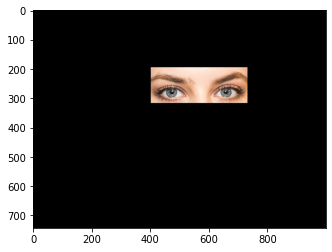

In [54]:
plt.imshow(extractedPart_f2)


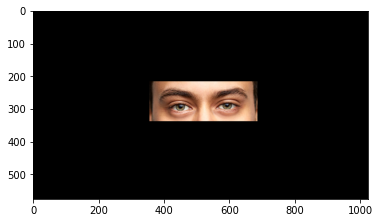

In [55]:
plt.imshow(extractedPart_f3)


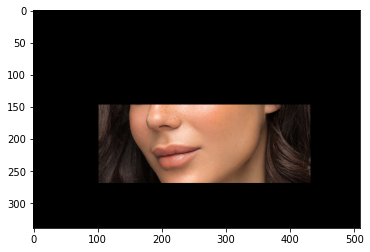

In [56]:
plt.imshow(extractedPart_f6)